In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_Anime.csv',index_col=0)
df['Release_year'] = pd.to_datetime(df['Release_year'] )
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14956 entries, 0 to 15488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          14956 non-null  object        
 1   Rank          14956 non-null  float64       
 2   Rating        14956 non-null  float64       
 3   Release_year  14956 non-null  datetime64[ns]
 4   Episodes      14956 non-null  float64       
 5   Type          14956 non-null  object        
 6   Studio        14956 non-null  object        
 7   Tags          14956 non-null  object        
 8   staff         14956 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.1+ MB


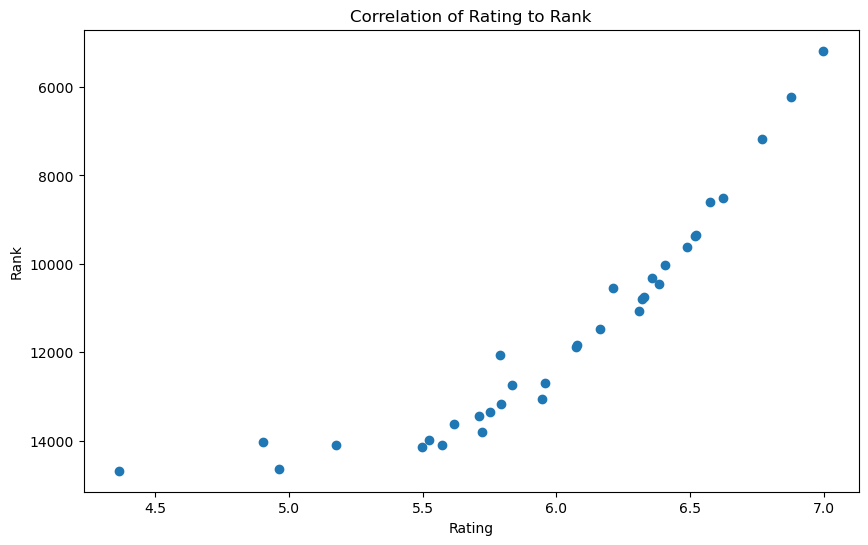

,Name,Rating,Rank
staff,,,
"Hitoshizuku-P : Producer, Yama△ : Producer",12,6.998333,5177.083333
Jin : Producer,19,6.876842,6216.631579
Mitchie M : Producer,12,6.770000,7174.333333
Last Note : Producer,14,6.624286,8508.285714
Honeyworks : Producer,32,6.574375,8603.250000
Rerulili : Producer,20,6.522000,9357.400000
Tekken : Director,16,6.518750,9368.250000
Seiichi Hayashi : Director,13,6.489231,9619.384615
Tadanari Okamoto : Director,27,6.407407,10016.814815


<Figure size 640x480 with 0 Axes>

In [3]:
#Analyze Staff
df.sort_values('staff')

staff_only = df[df.staff != 'unknown' ]

#View staff with the most shows made
staff_grouped_shows = staff_only.groupby('staff').\
agg({'Name':'count', 'Rating':'mean', 'Rank': 'mean'}).sort_values('Name', ascending = False)

#Subset with staffs that has made atleast 10 shows
staff_atleast_ten_shows = staff_grouped_shows.loc[staff_grouped_shows['Name'] > 10].\
sort_values('Rating', ascending = False)

plt.figure(figsize = (10,6))
plt.scatter('Rating', 'Rank', data = staff_atleast_ten_shows)
#invert y axis
plt.gca().invert_yaxis()
plt.xlabel('Rating')
plt.ylabel('Rank')
plt.title('Correlation of Rating to Rank')
plt.show()
plt.clf()
staff_atleast_ten_shows

In [4]:
##Analyze top 3 staffs by Rating
Top_three_staff_by_rating = staff_only[staff_only['staff'].isin(staff_atleast_ten_shows.index[:3])]
Top_three_staff_by_rating

,Name,Rank,Rating,Release_year,Episodes,Type,Studio,Tags,staff
5366,Hitoshizuku-P x Yama△: Bad ∞ End ∞ Night,4489.0,7.08,2012-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5367,Hitoshizuku-P x Yama△: Crazy ∞ nighT,5314.0,6.98,2015-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5368,Hitoshizuku-P x Yama△: EveR ∞ LastinG ∞ NighT,5210.0,6.98,2015-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5369,Hitoshizuku-P x Yama△: Karakuri Burst,5443.0,6.96,2011-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5370,Hitoshizuku-P x Yama△: Party×Party,4440.0,7.10,2014-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5371,Hitoshizuku-P x Yama△: Re:birthed,5360.0,6.98,2015-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5372,Hitoshizuku-P x Yama△: Shikiori no Hane,5817.0,6.92,2014-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5373,Hitoshizuku-P x Yama△: Twilight ∞ nighT,5445.0,6.96,2015-01-01,0.0,Music,unknown,Vocaloid,"Hitoshizuku-P : Producer, Yama△ : Producer"
5374,Hitoshizuku-P x Yama△: Vampire’s ∞ pathoS,5017.0,7.02,2019-01-01,0.0,Music,unknown,"Supernatural, Vampires, Vocaloid","Hitoshizuku-P : Producer, Yama△ : Producer"
5375,Hitoshizuku-P × Yama△: Kaizoku F no Shouzou,4201.0,7.12,2014-01-01,0.0,Music,unknown,"Fantasy, Person in a Strange World, Vocaloid, ...","Hitoshizuku-P : Producer, Yama△ : Producer"


# Set data to your personalized genre preference

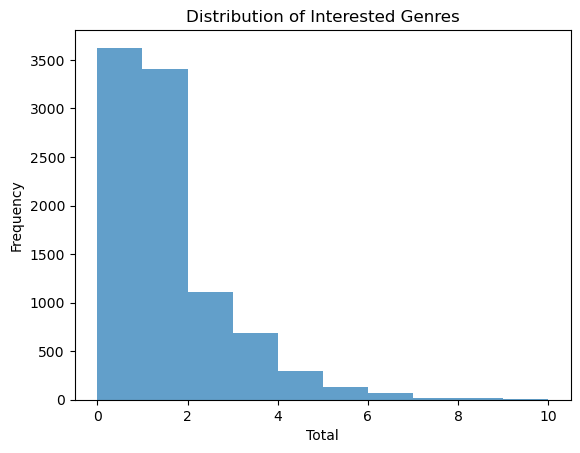

In [9]:
only_tags = df[(df['Type']!= 'Movie') & (df.staff != 'unknown') ].loc[:,['Name','Tags','staff']]

#Identify Genres. Comment out when not needed
#with pd.option_context('display.max_colwidth', None):
#    print(Studio_100_plus.loc['Bones'])

Interested_Genres = ['Action', 'Adventure', 'Comedy', 'Drama',\
'Fantasy','Shounen','Martial Arts', 'Violence','Superpowers',\
                     'Overpowered Main Characters','Isekai','Sexual Content','Magic']
only_tags[Interested_Genres] = 0
only_tags[Interested_Genres] = only_tags[Interested_Genres].astype(float)

#Remove square brackets 
only_tags['Tags'] = only_tags['Tags'].str.replace(r'\[|\]','',regex = True)
only_tags.set_index('Name', inplace=True)


#Algorithm to retrieve shows that has the interested Genres
for name, genres in zip(only_tags.index,only_tags['Tags']):
    tags = genres.split(',')
    
    for genre in tags:
        genre = genre.strip()
        #Add weights(Importance)to the genre
        if genre in ['Action', 'Adventure','Comedy','Isekai','Violence','Sexual Content']:
            only_tags.loc[name,genre] = 1
        elif genre in ['Fantasy','Shounen', 'Drama']:
            only_tags.loc[name,genre] = .5
        elif genre in ['Overpowered Main Characters','Superpowers','Martial Arts','Magic']:
            only_tags.loc[name,genre] = 2
            

only_tags['Total'] = only_tags.iloc[:,2:].sum(axis=1)
Six_or_More_Genres = only_tags[only_tags['Total'] > 5].sort_values('Total', ascending = False)            


#only_tags[only_tags.index.str.contains('Overlord')]

only_tags['Total'].plot(bins = 10, kind = 'hist', alpha=0.7)
# Set the labels and title
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Distribution of Interested Genres')

# Show the plot
plt.show()

#Display the shows that are on the top of the list
#with pd.option_context('display.max_rows', None):
#    print(Six_or_More_Genres)


## Adjusted Ranking of staffs by interested Genres

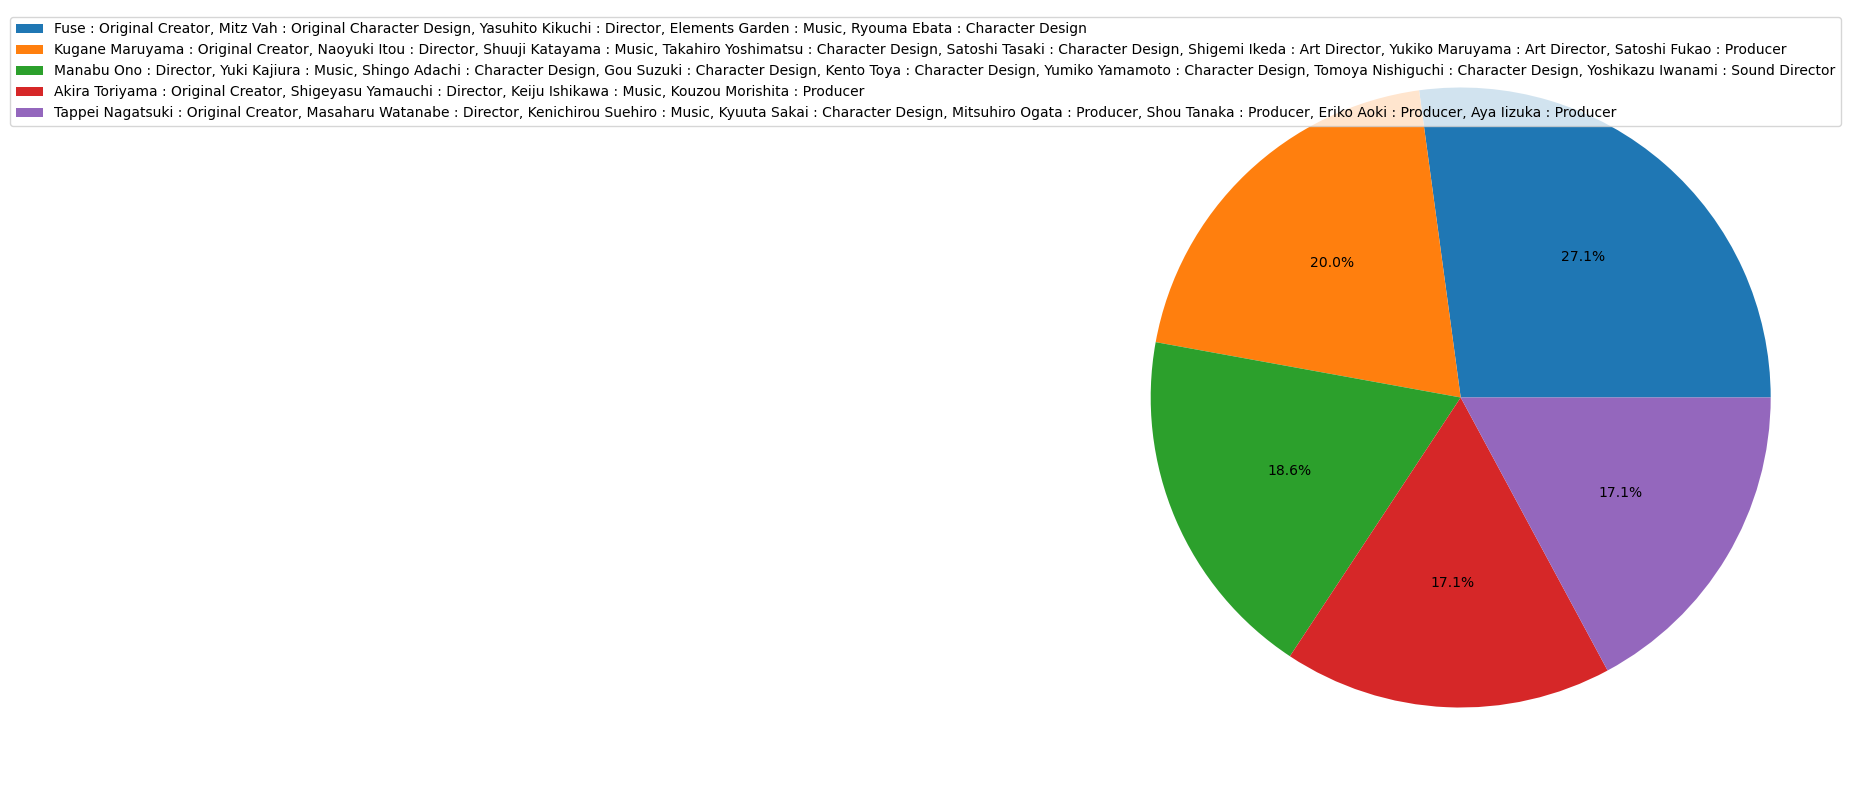

<Figure size 640x480 with 0 Axes>

In [10]:

Adjusted_staffs = Six_or_More_Genres.groupby('staff').agg({'Total':'sum'}).sort_values('Total', ascending = False)
Adjusted_staffs

plt.figure(figsize = (10,15))
Adjusted_staffs.iloc[:5,0].plot.pie(autopct= '%1.1f%%', ylabel="", labels = None)
plt.legend(Adjusted_staffs.index)
plt.show()
plt.clf()

#Adjusted_staffs

Text(0.5, 1.0, 'Highest Ranking Shows by Top Staff')

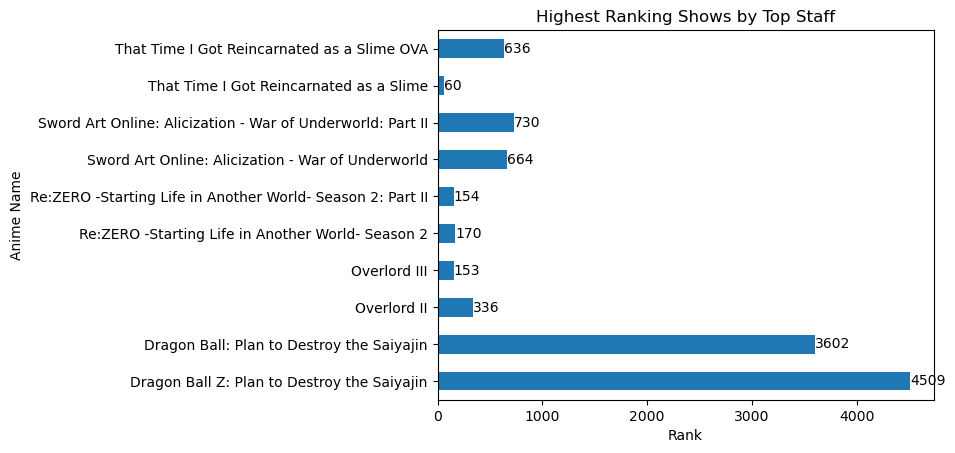

In [11]:
#View the top rated shows for each staff
Top_rated_shows = staff_only[staff_only['staff'].isin(Adjusted_staffs.index[:5])]


ax = Top_rated_shows.plot.barh(x= 'Name',y = 'Rank', ylabel= 'Anime Name',xlabel='Rank',legend = False)

# Add text annotations
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title('Highest Ranking Shows by Top Staff')
#Top_rated_shows

# Create a test train csv using your preferred genre
Which means add a row that signifies if an anime is good or not.

In [12]:
Test_Train = df.loc[:]

Test_Train['Good_Anime'] = 0
Good = Six_or_More_Genres.reset_index()
mask = Test_Train['Name'].isin(Good['Name'])
Test_Train.loc[mask, 'Good_Anime']  = 1

Test_Train['Good_Anime'].value_counts()

Test_Train.to_csv('Train_Staff_data.csv')
#Test_Train.sort_values('Rank')